In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel('new_data.xls')

In [3]:
data.head()

,latitude,longitude,#beds,#baths,#square_feet,elevator,doorman,unit#,stories#,complex,#beds_mv,#baths_mv,#square_feet_mv,stories#_mv,BUILD_YEAR(1800-1900),BUILD_YEAR(1900-2000),BUILD_YEAR(2000-2019),price
0,40.7578,-73.9668,2,1.0,1292.897977,True,False,406,30,0,1,0,1,0,0,1,0,465000
1,40.7410,-73.9971,2,2.0,1051.000000,True,False,26,12,0,0,0,0,0,0,0,1,2495000
2,40.7846,-73.9712,2,1.0,1000.000000,True,False,86,11,0,0,0,0,0,0,1,0,1095000
3,40.7764,-73.9771,2,1.0,1292.897977,True,False,174,31,0,1,0,1,0,0,1,0,499000
4,40.7305,-73.9931,2,1.0,1292.897977,True,True,389,31,0,0,0,1,0,0,1,0,2195000


In [4]:
data['price'].hist(bins=100)

In [5]:
np.random.seed(1352)
shuffled_data = data.loc[np.random.permutation(data.index), :]
shuffled_data.head()

,latitude,longitude,#beds,#baths,#square_feet,elevator,doorman,unit#,stories#,complex,#beds_mv,#baths_mv,#square_feet_mv,stories#_mv,BUILD_YEAR(1800-1900),BUILD_YEAR(1900-2000),BUILD_YEAR(2000-2019),price
5443,40.782799,-73.948799,2,1.5,1046.000000,True,True,290,32,1,0,0,0,0,0,1,0,1395000
4710,40.776699,-73.982498,1,1.0,1292.897977,True,True,264,29,0,0,0,1,0,0,1,0,725000
10046,40.788304,-73.979082,2,1.5,1292.897977,True,False,36,9,0,0,0,1,0,0,1,0,1200000
3787,40.768710,-73.957190,2,2.0,1292.897977,True,True,219,20,0,0,0,1,0,0,1,0,1350000
9346,40.764500,-73.974400,1,1.5,1063.000000,True,True,282,20,0,0,0,0,0,0,1,0,1975000


In [6]:
n_train = int(0.85*len(data))
n_test = int(0.15*len(data))
X_train, y_train = shuffled_data.iloc[:n_train, :].drop(['price'], axis=1), shuffled_data.iloc[:n_train]['price']
X_test, y_test = shuffled_data.iloc[n_train:, :].drop(['price'], axis=1), shuffled_data.iloc[n_train:]['price']

In [7]:
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)
r2_score(y_test, y_test_lr), r2_score(y_train, y_train_lr)

(0.6708954336521578, 0.6163619589196894)

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=8570)
regressor.fit(X_train, y_train)
y_test_dt = regressor.predict(X_test)
y_train_dt = regressor.predict(X_train)
r2_score(y_test, y_test_dt), r2_score(y_train, y_train_dt)

(0.517229771312993, 0.9994186054959178)

In [10]:
max_depths = [3*x for x in range(2,7)]
min_samples_leafs = [2*x+1 for x in range(6)]
dt_r2 = {depth:[] for depth in max_depths}
# dt_train_r2 = {depth:[] for depth in max_depths}
for max_d in max_depths:
    for min_s in min_samples_leafs:
        regressor = DecisionTreeRegressor(random_state=8570, max_depth=max_d, min_samples_leaf=min_s)
        regressor.fit(X_train, y_train)
        y_test_dt = regressor.predict(X_test)
#         y_train_dt = regressor.predict(X_train)
        dt_r2[max_d].append(r2_score(y_test, y_test_dt))
#         dt_train_r2[max_d].append(r2_score(y_train, y_train_dt))

Best model: max_depths = 12	min_samples_leafs = 7
R²: 0.7564876384277828


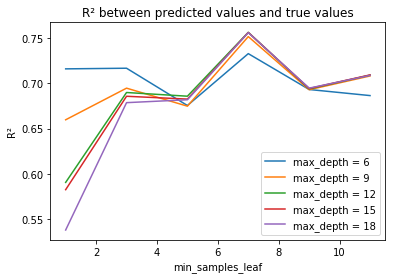

In [11]:
%matplotlib inline
for max_d in max_depths:
    plt.plot(min_samples_leafs, dt_r2[max_d])
plt.legend(['max_depth = '+str(x) for x in max_depths])
plt.xlabel('min_samples_leaf')
plt.ylabel('R2'.translate(SUP))
plt.title('R2 between predicted values and true values'.translate(SUP))
r2_array = np.array([dt_r2[x] for x in max_depths])
max_id = np.unravel_index(np.argmax(r2_array), r2_array.shape)
print('Best model: max_depths = {}\tmin_samples_leafs = {}'.format(max_depths[max_id[0]], min_samples_leafs[max_id[1]]))
print('R2:'.translate(SUP), r2_array[max_id])

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=8570)
rf.fit(X_train, y_train)
y_test_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)
r2_score(y_test, y_test_rf), r2_score(y_train, y_train_rf)

C:\Apps\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.7755623824924495, 0.9721144256137297)

In [13]:
# max_depths = [3*x for x in range(2,7)]
min_samples_leafs = [4*x+1 for x in range(6)]
n_estimatorss = [20*x for x in range(1, 7)]
# max_featuress = ['auto', 'sqrt']
rf_r2 = {ne:[] for ne in n_estimatorss}
# dt_train_r2 = {depth:[] for depth in max_depths}
for n_est in n_estimatorss:
    for min_s in min_samples_leafs:
        rf = RandomForestRegressor(random_state=8570, max_depth=9, min_samples_leaf=min_s, n_estimators=n_est)
        rf.fit(X_train, y_train)
        y_test_rf = rf.predict(X_test)
#         y_train_dt = rf.predict(X_train)
        rf_r2[n_est].append(r2_score(y_test, y_test_rf))
#         dt_train_r2[max_d].append(r2_score(y_train, y_train_dt))

Best model: n_estimators = 40	min_samples_leafs = 9
R²: 0.8300295784167994


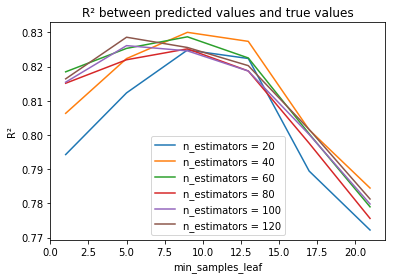

In [14]:
%matplotlib inline
for n_est in n_estimatorss:
    plt.plot(min_samples_leafs, rf_r2[n_est])
plt.legend(['n_estimators = '+str(x) for x in n_estimatorss])
plt.xlabel('min_samples_leaf')
plt.ylabel('R2'.translate(SUP))
plt.title('R2 between predicted values and true values'.translate(SUP))
r2_array = np.array([rf_r2[x] for x in n_estimatorss])
max_id = np.unravel_index(np.argmax(r2_array), r2_array.shape)
print('Best model: n_estimators = {}\tmin_samples_leafs = {}'.format(n_estimatorss[max_id[0]], min_samples_leafs[max_id[1]]))
print('R2:'.translate(SUP), r2_array[max_id])

## Best Model

In [15]:
rf = RandomForestRegressor(random_state=8570, max_depth=9, min_samples_leaf=9, n_estimators=40)
rf.fit(X_train, y_train)
y_test_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)
r2_score(y_test, y_test_rf), r2_score(y_train, y_train_rf)

(0.8300295784167994, 0.8436523265162462)

([<matplotlib.axis.YTick at 0x2319fa4a4a8>,
 <a list of 17 Text yticklabel objects>)

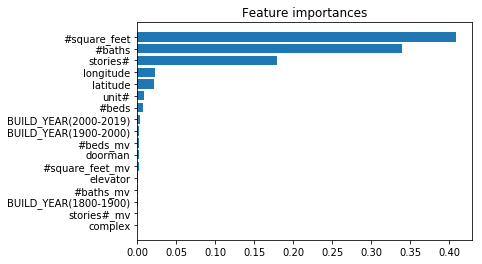

In [16]:
imp = rf.feature_importances_
sorted_idx = np.argsort(imp)
plt.title("Feature importances")
# plt.barh(data.columns[:-1][sorted_idx], imp[sorted_idx])
plt.barh(range(len(sorted_idx)), imp[sorted_idx])
plt.yticks(range(len(sorted_idx)), [data.columns[:-1][i] for i in sorted_idx])

# Gradient Boost

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
gbr = GradientBoostingRegressor(random_state=8570)
gbr.fit(X_train, y_train)
y_test_gb = gbr.predict(X_test)
y_train_gb = gbr.predict(X_train)
r2_score(y_test, y_test_gb), r2_score(y_train, y_train_gb)

(0.8322058971322585, 0.8974212778742423)

In [19]:
# min_samples_split
min_samples_leafs = [3*x for x in range(6,12)]
# max_depth = [3*x for x in range(2,7)]
# learning_rate = [0.01, 0.05, 0.1, 0.2]
# max_features = ['auto', 'sqrt']
n_estimators = [20*x for x in range(6, 10)]
# subsample = [0.8, 0.9, 1]
gb_r2 = {ne:[] for ne in n_estimators}
# dt_train_r2 = {depth:[] for depth in max_depths}
for ne in n_estimators:
    for min_l in min_samples_leafs:
        gbr = GradientBoostingRegressor(random_state=8570, max_depth=12, min_samples_leaf=min_l, learning_rate=0.05, n_estimators=ne, subsample=0.9, max_features='sqrt')
        gbr.fit(X_train, y_train)
        y_test_gb = gbr.predict(X_test)
#         y_train_dt = rf.predict(X_train)
        gb_r2[ne].append(r2_score(y_test, y_test_gb))
#         dt_train_r2[max_d].append(r2_score(y_train, y_train_dt))

Best model: n_estimators = 180	min_samples_leafs = 24
R²: 0.8500382119216743


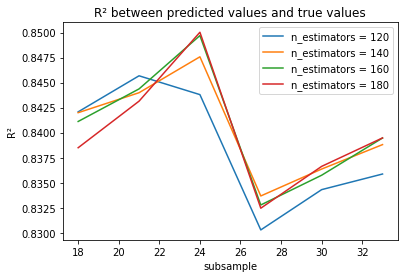

In [20]:
%matplotlib inline
for ne in n_estimators:
    plt.plot(min_samples_leafs, gb_r2[ne])
plt.legend(['n_estimators = '+str(x) for x in n_estimators])
plt.xlabel('subsample')
plt.ylabel('R2'.translate(SUP))
plt.title('R2 between predicted values and true values'.translate(SUP))
r2_array = np.array([gb_r2[x] for x in n_estimators])
max_id = np.unravel_index(np.argmax(r2_array), r2_array.shape)
print('Best model: n_estimators = {}\tmin_samples_leafs = {}'.format(n_estimators[max_id[0]], min_samples_leafs[max_id[1]]))
print('R2:'.translate(SUP), r2_array[max_id])

In [28]:
gbr = GradientBoostingRegressor(random_state=8570, max_depth=12, min_samples_leaf=24, learning_rate=0.05, n_estimators=180, subsample=0.9, max_features='sqrt')
#                                 , n_iter_no_change=20)
gbr.fit(X_train, y_train)
y_test_gb = gbr.predict(X_test)
y_train_gb = gbr.predict(X_train)
r2_score(y_test, y_test_gb), r2_score(y_train, y_train_gb)

(0.8500382119216743, 0.8984518931897333)

In [22]:
import sklearn
sklearn.__version__

'0.20.1'

In [29]:
from sklearn.metrics import mean_squared_error

Sweet spot: n_estimators=108


Text(0,0.5,'Deviance')

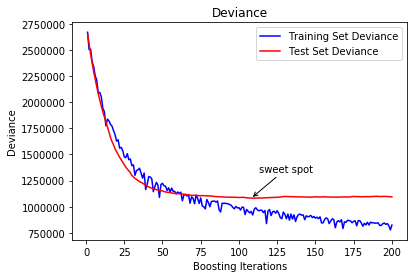

In [31]:
params = {'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 21,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':8570, 'subsample':0.9, 'max_features':'sqrt'}
clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
# mse = mean_squared_error(y_test, clf.predict(X_test))
# print("MSE: %.4f" % mse)
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = np.sqrt(clf.loss_(y_test, y_pred))

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
plt.title('Deviance')
sweet_x = np.argmin(test_score)
sweet_y = test_score[sweet_x]
print('Sweet spot: n_estimators={}'.format(sweet_x))
plt.annotate('sweet spot', xy=(sweet_x, sweet_y), xytext=(sweet_x+5, sweet_y+25e4), arrowprops=dict(facecolor='black',arrowstyle="->"))
plt.plot(np.arange(params['n_estimators']) + 1, np.sqrt(clf.train_score_), 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Text(0.5,1,'Variable Importance')

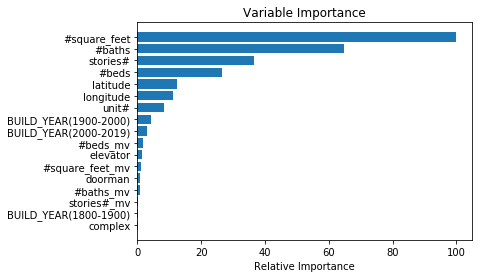

In [32]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[:-1][sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
# plt.show()

In [33]:
alpha = 0.6
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=108, max_depth=12,
                                learning_rate=0.05, min_samples_leaf=21, random_state=8570, subsample=0.9, max_features='sqrt')

clf.fit(X_train, y_train)

# Make the prediction on the meshed x-axis
y_upper = clf.predict(X_test)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X_train, y_train)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(X_test)

clf.set_params(loss='ls')
clf.fit(X_train, y_train)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(X_test)

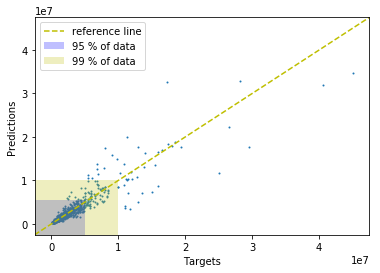

In [64]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.axis([0-0.25e7,max(y_test)+0.25e7, 0-0.25e7,max(y_test)+0.25e7])
plt.axvspan(0-0.25e7, 0.5e7, 0, 0.16, facecolor='b', alpha=0.25, label='95 % of data')
plt.axvspan(0-0.25e7, 1e7, 0, 0.25, facecolor='y', alpha=0.25, label='99 % of data')
plt.plot([0-0.25e7,max(y_test)+0.25e7], [0-0.25e7,max(y_test)+0.25e7], 'y--', label='reference line')
plt.legend(loc='upper left')

In [40]:
print(sum(data['price']<=0.5e7)/len(data))

0.9474314931692898


In [45]:
print(sum(data['price']<=1e7)/len(data))

0.9863385795318367


In [71]:
data95 = y_test<=0.5e7
X_test_95 = X_test[data95]
y_pred_95 = clf.predict(X_test_95)

data99 = y_test<=1e71
X_test_99 = X_test[data99]
y_pred_99 = clf.predict(X_test_99)

In [74]:
mse_95 = mean_squared_error(y_test[data95], y_pred_95)
mse_99 = mean_squared_error(y_test[data99], y_pred_99)
mse = mean_squared_error(y_test, y_pred)
print('RMSE (All data): {}'.format(np.sqrt(mse)))
print('RMSE (99 % data): {}'.format(np.sqrt(mse_99)))
print('RMSE (95 % data): {}'.format(np.sqrt(mse_95)))

RMSE (All data): 1081501.7358215733
RMSE (99 % data): 1081501.7358215733
RMSE (95 % data): 454635.66072490753
